In [6]:
### IMPORT: ------------------------------------
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
from scipy.stats import skew
plt.style.use('ggplot')
import missingno as msno # to get visualization on missing values
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations
import statsmodels.api as sm
print("Load Libraries- Done")

Load Libraries- Done


In [10]:
#Reading the csv file  used car data.csv 
df=pd.read_csv('used_cars_dataset.csv')
cars=df.copy()
print(f'There are {cars.shape[0]} rows and {cars.shape[1]} columns') # fstring 

There are 7253 rows and 14 columns


In [11]:
# inspect data, print top 5 
cars.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,1.75000
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00000,NaN,12.50000
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00000,8.61 Lakh,4.50000
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00000,NaN,6.00000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00000,NaN,17.74000


In [12]:
# bottom 5 rows:
cars.tail(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00000,NaN,nan
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00000,NaN,nan
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00000,NaN,nan
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00000,NaN,nan
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.00000,NaN,nan


In [13]:
#get the size of dataframe
print ("Rows     : " , cars.shape[0])  #get number of rows/observations
print ("Columns  : " , cars.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", cars.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", cars.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(cars.isna().sum() / cars.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\nUnique values :  \n\n", cars.nunique())  #  count of unique values


Rows     :  7253
Columns  :  14
######################################## 
 Features : 

 ['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']
######################################## 
Missing values :

 New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64
######################################## 
Percent of missing :

 S.No.                0.00000
Name                 0.00000
Location             0.00000
Year                 0.00000
Kilometers_Driven    0.00000
Fuel_Type            0.00000
Transmission         0.00000
Owner_Type           0.00000
Mileage      

In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<AxesSubplot:>

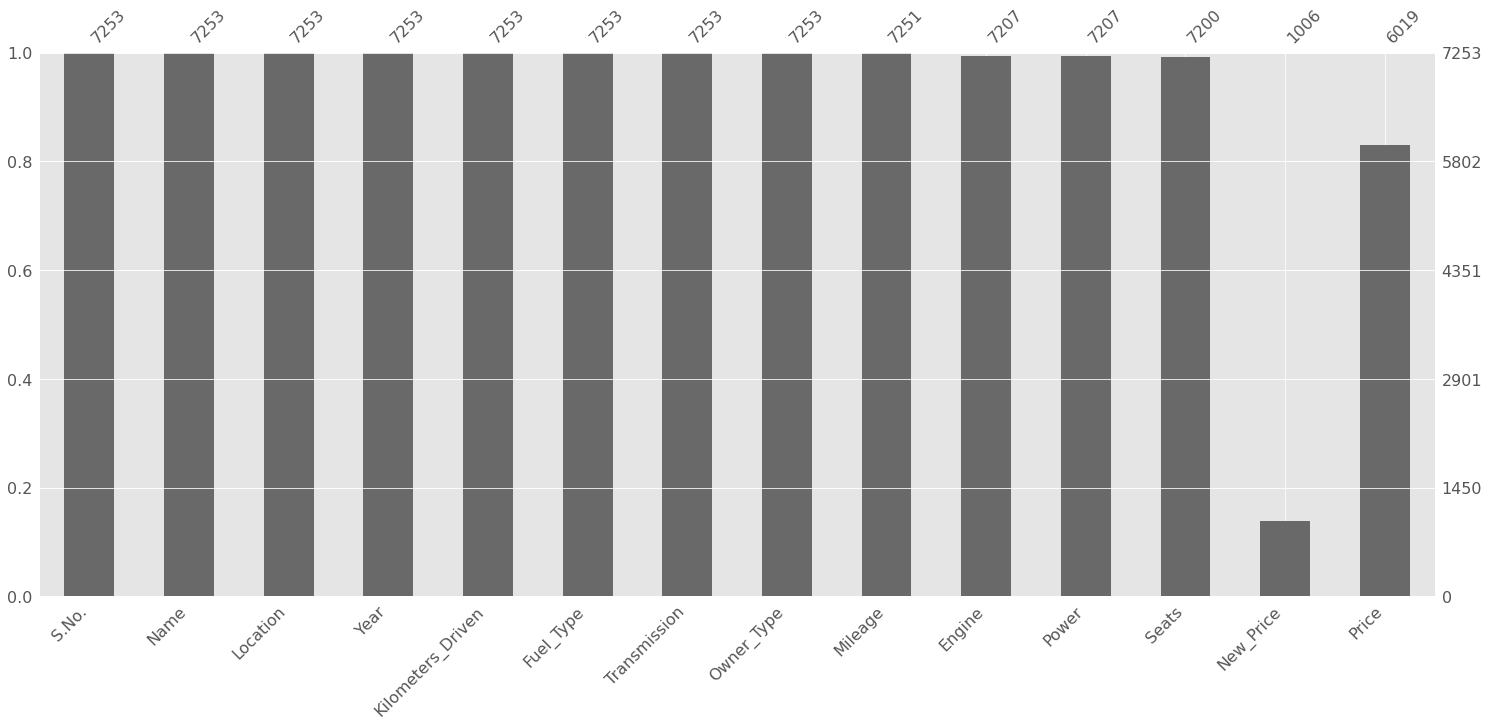

In [15]:
#Visualize missing values
msno.bar(cars)


In [16]:
# Making a list of all categorical variables
cat_col = [
    "Fuel_Type",
    "Location",
    "Transmission",
    "Seats",
    "Year",
    "Owner_Type",
    
]
# Printing number of count of each unique value in each column
for column in cat_col:
    print(cars[column].value_counts())
    print("#" * 40)


Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
########################################
Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
########################################
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
########################################
5.00000     6047
7.00000      796
8.00000      170
4.00000      119
6.00000       38
2.00000       18
10.00000       8
9.00000        3
0.00000        1
Name: Seats, dtype: int64
########################################
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998  